<a href="https://colab.research.google.com/github/NicolasLopes7/predict-covid/blob/master/predictCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [0]:
covid = pd.read_csv('https://raw.githubusercontent.com/NicolasLopes7/predict-covid/master/covid_19_data.csv')

In [0]:
covid.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country',"Deaths":"Mortes"}, inplace=True)

In [87]:
mortes = covid.groupby('Date').sum()['Mortes'].reset_index()
mortes.tail()

,Date,Mortes
75,04/06/2020,74565.0
76,04/07/2020,81865.0
77,04/08/2020,88338.0
78,04/09/2020,95455.0
79,04/10/2020,102525.0


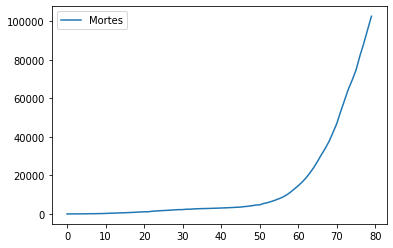

In [88]:
mortes.plot()

In [0]:
mortes.columns = ['ds', 'y']
mortes['ds'] = pd.to_datetime(mortes['ds'])

In [0]:
dias = 30

In [91]:
m = Prophet(interval_width=0.95)
m.fit(mortes)
futuro = m.make_future_dataframe(periods=dias)
futuro.tail(dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
80,2020-04-11
81,2020-04-12
82,2020-04-13
83,2020-04-14
84,2020-04-15
85,2020-04-16
86,2020-04-17
87,2020-04-18
88,2020-04-19
89,2020-04-20


In [0]:
previsao = m.predict(futuro)


In [93]:
previsao.tail(dias)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
80,2020-04-11,100637.947065,97280.886157,103544.648556,100495.821666,100838.144035,-185.548559,-185.548559,-185.548559,-185.548559,-185.548559,-185.548559,0.0,0.0,0.0,100452.398506
81,2020-04-12,105574.965855,102136.785972,108440.513803,105088.433857,106159.703223,-327.311760,-327.311760,-327.311760,-327.311760,-327.311760,-327.311760,0.0,0.0,0.0,105247.654095
82,2020-04-13,110511.984644,106866.121185,113387.116861,109610.698082,111569.495197,-360.012752,-360.012752,-360.012752,-360.012752,-360.012752,-360.012752,0.0,0.0,0.0,110151.971892
83,2020-04-14,115449.003434,111945.270760,118728.500983,114000.966278,117070.281499,-88.333185,-88.333185,-88.333185,-88.333185,-88.333185,-88.333185,0.0,0.0,0.0,115360.670249
84,2020-04-15,120386.022223,116902.016348,124327.610863,118403.127428,122765.585714,200.739062,200.739062,200.739062,200.739062,200.739062,200.739062,0.0,0.0,0.0,120586.761286
85,2020-04-16,125323.041013,121597.747007,129779.897208,122562.285960,128335.364552,322.335612,322.335612,322.335612,322.335612,322.335612,322.335612,0.0,0.0,0.0,125645.376625
86,2020-04-17,130260.059802,126345.480966,135204.314822,126828.041866,133861.634650,438.131582,438.131582,438.131582,438.131582,438.131582,438.131582,0.0,0.0,0.0,130698.191384
87,2020-04-18,135197.078592,130037.226627,140100.235240,131075.199815,139598.796633,-185.548559,-185.548559,-185.548559,-185.548559,-185.548559,-185.548559,0.0,0.0,0.0,135011.530032
88,2020-04-19,140134.097381,133804.564969,145793.965598,135328.950387,145441.844903,-327.311760,-327.311760,-327.311760,-327.311760,-327.311760,-327.311760,0.0,0.0,0.0,139806.785621
89,2020-04-20,145071.116171,138444.480030,151405.007721,139545.638908,151125.580584,-360.012752,-360.012752,-360.012752,-360.012752,-360.012752,-360.012752,0.0,0.0,0.0,144711.103418


In [94]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-399.260911,-3845.694632,2391.273157
1,2020-01-23,-183.116190,-3157.745854,2860.097809
2,2020-01-24,27.227952,-2972.080948,3005.944740
3,2020-01-25,-501.904017,-3524.058878,2506.988814
4,2020-01-26,-549.119045,-3688.023066,2802.944628
...,...,...,...,...
105,2020-05-06,224264.155864,200695.360072,250468.415483
106,2020-05-07,229322.771203,204636.517564,256911.258142
107,2020-05-08,234375.585963,207925.332504,263879.426561
108,2020-05-09,238688.924611,210549.312236,269242.611907


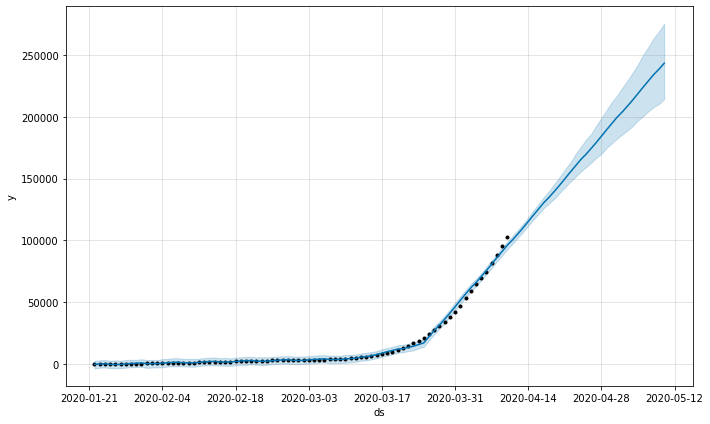

In [95]:
grafico_previsao = m.plot(previsao)